# Importing the data and Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

data=pd.read_csv("Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Observing the data and checking out null values

In [2]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
data.info() # Gives a count for non-null values and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.isnull().sum() # Null-value counts

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Handling Missing Values

In [5]:
# More than 50% of the data in Cabin are missing so dropping it is better.
data.drop('Cabin',axis=1,inplace=True)

# Name,PassengerId and Ticket aren't useful for finding if they survived or not so they can be dropped.
data.drop('Name',axis=1,inplace=True)
data.drop('Ticket',axis=1,inplace=True)
data.drop('PassengerId',axis=1,inplace=True)

In [6]:
# Embarked is categorical so I will replace it with mode.
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

# I will replace Age column null values with median since it is skewed.
data['Age']=data['Age'].fillna(data['Age'].median())

data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Encoding Categorical Variables.

In [7]:
print(data['Embarked'].value_counts())
print(data['Sex'].value_counts())

data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

mapping={
    'male':0,
    'female':1
}

data['Sex']=data['Sex'].map(mapping)

print(data.columns)
data['Sex'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64
Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


Sex
0    577
1    314
Name: count, dtype: int64

C:\Users\pnsri\AppData\Local\Temp\ipykernel_28360\44881957.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')
C:\Users\pnsri\AppData\Local\Temp\ipykernel_28360\44881957.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')
C:\Users\pnsri\AppData\Local\Temp\ipykernel_28360\44881957.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')
C:\Users\pnsri\AppData\Local\Temp\ipykernel_28360\44881957.py:15: FutureWarning: 

Passing `palette` wi

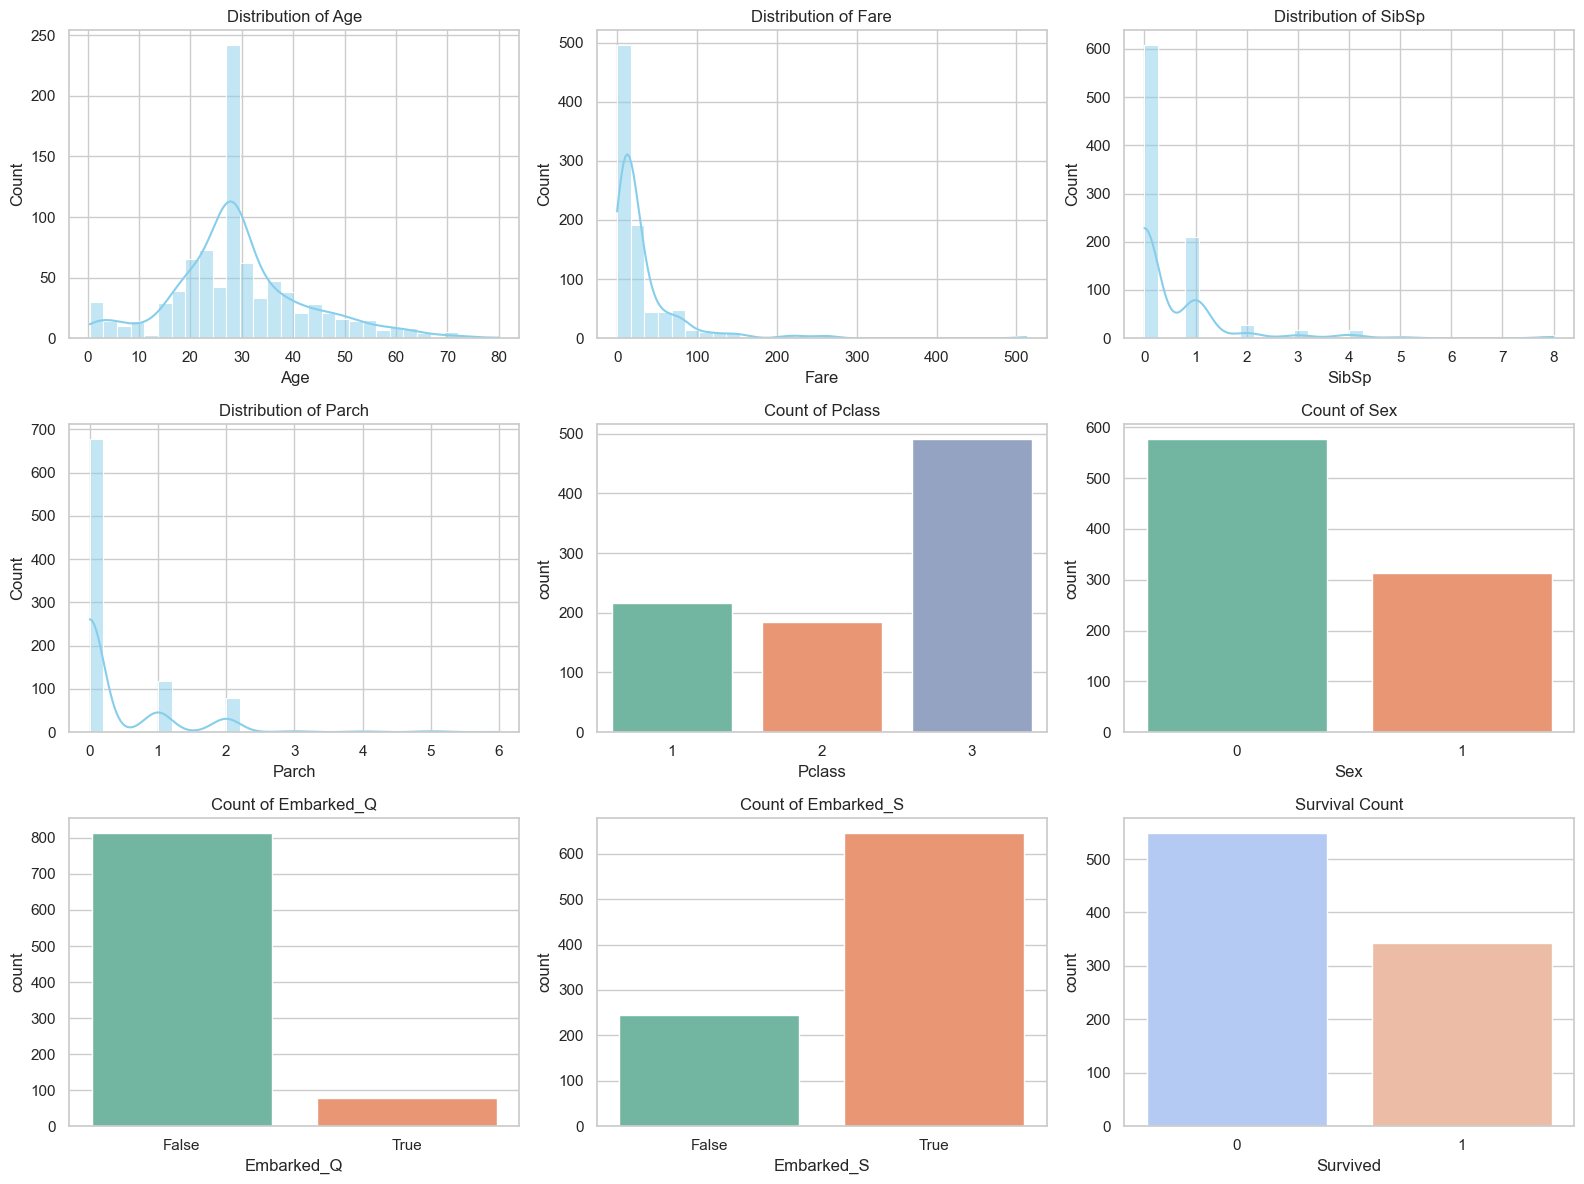

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 12))
# List of numeric columns
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')

categorical_cols = ['Pclass', 'Sex', 'Embarked_Q', 'Embarked_S']

for i, col in enumerate(categorical_cols, len(num_cols)+1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=data, palette='Set2')
    plt.title(f'Count of {col}')

# Plot target variable
plt.subplot(3, 3, len(num_cols) + len(categorical_cols) + 1)
sns.countplot(x='Survived', data=data, palette='coolwarm')
plt.title('Survival Count')

plt.tight_layout()
plt.show()


In [9]:
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


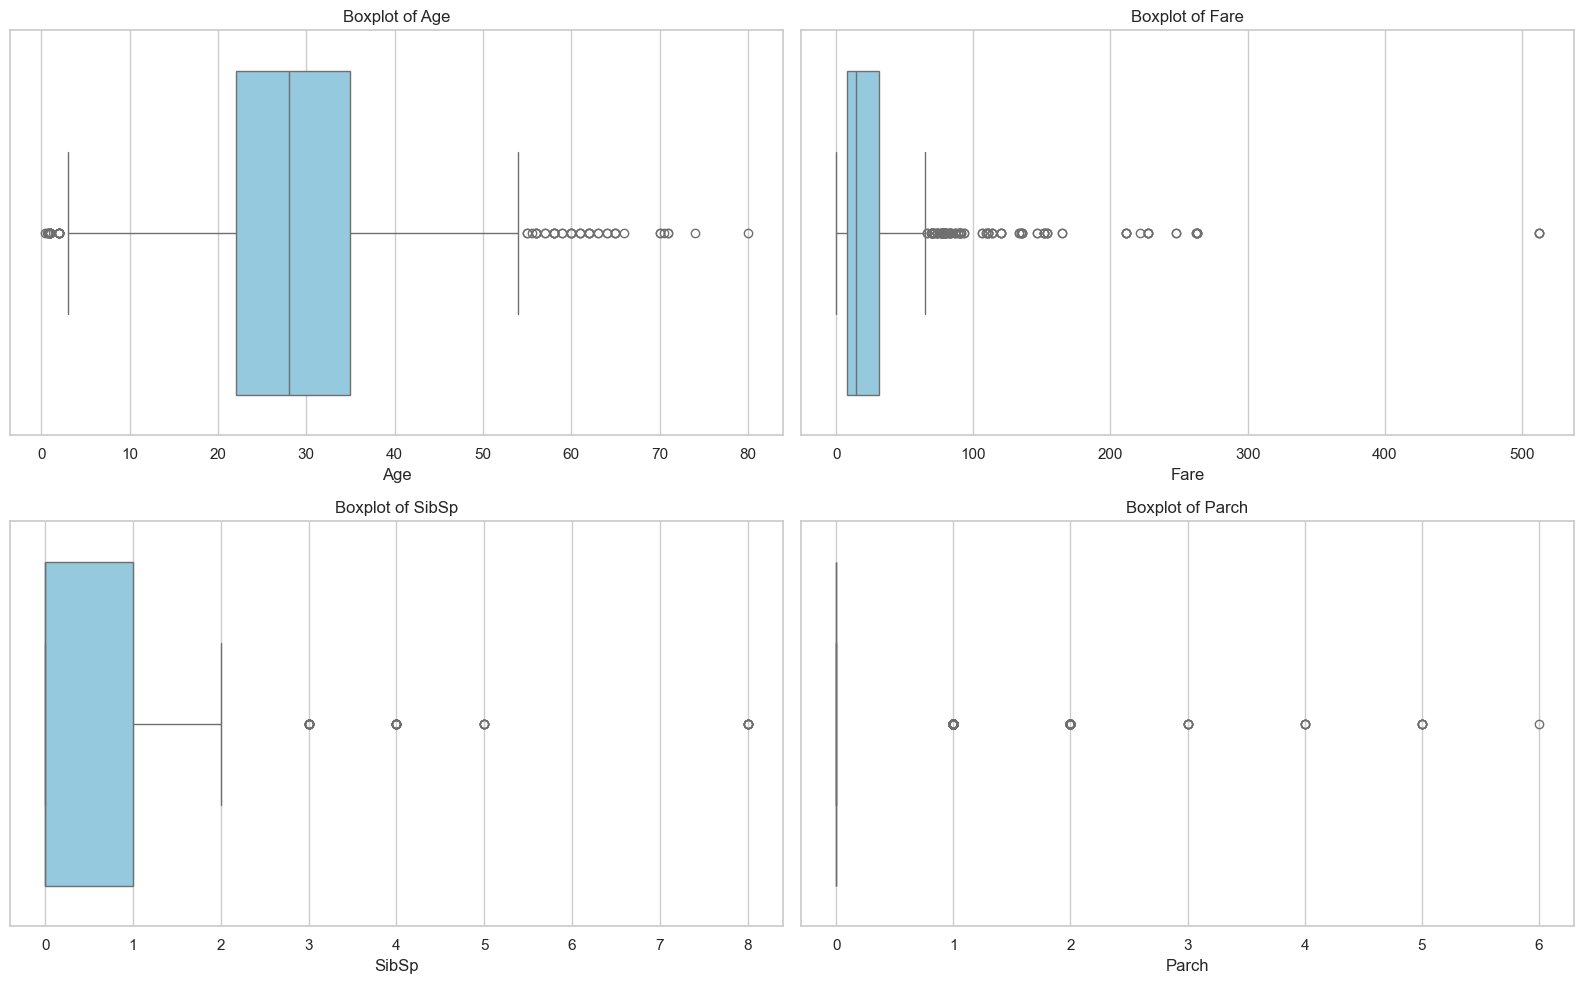

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.xlabel(col)

plt.tight_layout()
plt.show()


In [11]:
for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)

    IQR = Q3- Q1
    minimum_range = Q1 - 1.5* IQR
    maximum_range = Q3 + 1.5* IQR

    outliers = ((data[col] < minimum_range) | (data[col] > maximum_range))
    print(f'The Number of outliers in {col} is {outliers.sum()}')

The Number of outliers in Age is 66
The Number of outliers in Fare is 116
The Number of outliers in SibSp is 46
The Number of outliers in Parch is 213


# Removing outliers

In [12]:
for col in num_cols:
    if(col=="Age"):
        continue
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)

    IQR = Q3- Q1
    minimum_range = Q1 - 1.5* IQR
    maximum_range = Q3 + 1.5* IQR

    outliers = ((data[col] < minimum_range) | (data[col] > maximum_range))
    median_val=data[col].median()
    data.loc[outliers,col]=median_val

In [13]:
for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)

    IQR = Q3- Q1
    minimum_range = Q1 - 1.5* IQR
    maximum_range = Q3 + 1.5* IQR

    outliers = ((data[col] < minimum_range) | (data[col] > maximum_range))
    print(f'The Number of outliers in {col} is {outliers.sum()}')

The Number of outliers in Age is 66
The Number of outliers in Fare is 48
The Number of outliers in SibSp is 0
The Number of outliers in Parch is 0


# Standardizing the data

In [16]:
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols]) # Only for numerical calls

In [17]:
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,8.910000e+02,8.910000e+02,891.0,8.910000e+02
mean,0.383838,2.308642,0.352413,-2.791133e-17,-8.373399e-17,0.0,-3.987333e-18
std,0.486592,0.836071,0.477990,1.000562e+00,1.000562e+00,0.0,1.000562e+00
min,0.000000,1.000000,0.000000,-2.224156e+00,-5.704719e-01,0.0,-1.368156e+00
25%,0.000000,2.000000,0.000000,-5.657365e-01,-5.704719e-01,0.0,-7.455778e-01
50%,0.000000,3.000000,0.000000,-1.046374e-01,-5.704719e-01,0.0,-2.305564e-01
75%,1.000000,3.000000,1.000000,4.333115e-01,1.347605e+00,0.0,5.325391e-01
max,1.000000,3.000000,1.000000,3.891554e+00,3.265682e+00,0.0,3.747586e+00
